# heartdiesease-analysis

Use the "Run" button to execute the code.

# New section

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 6.3MB/s 


In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="heartdiesease-analysis")

In [9]:
pip install opendatasets --upgrade --quiet

DOWNLOADING DATA

In [13]:
import opendatasets as od
download_url = 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shrutimishra119
Your Kaggle Key: ··········


100%|██████████| 4.11k/4.11k [00:00<00:00, 1.16MB/s]

In [18]:
datafilename = './heart-attack-analysis-prediction-dataset/heart.csv'

In [14]:
import pandas as pd

In [21]:
df = pd.read_csv(datafilename)

In [24]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


to check if there any null value or duplicate

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


keynotes
### minimum age is 29 while maximum age is 77 and average age is 54.

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### no null values

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# finding corelation among the attributes

In [32]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt


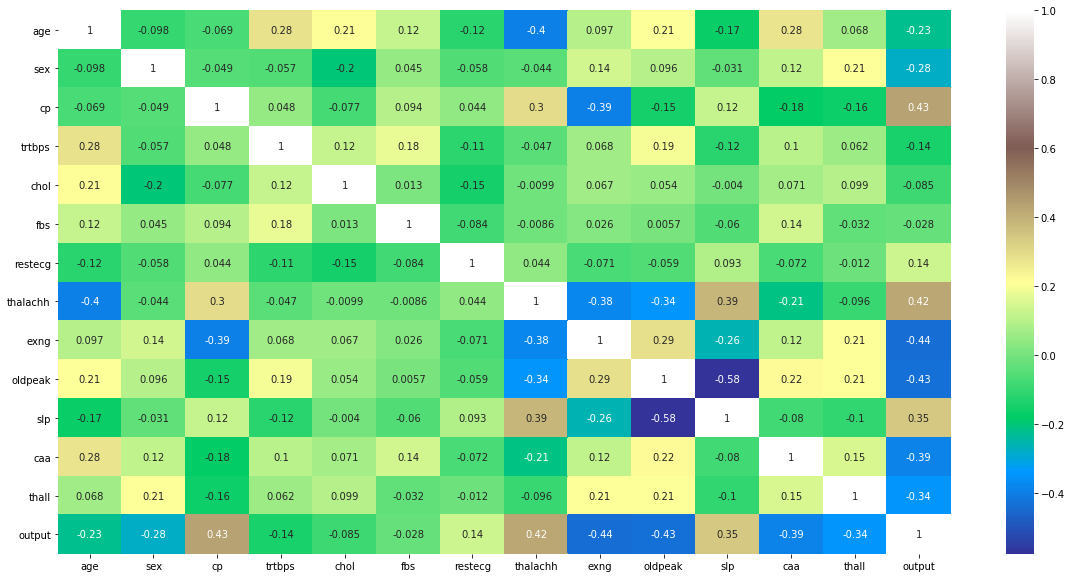

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

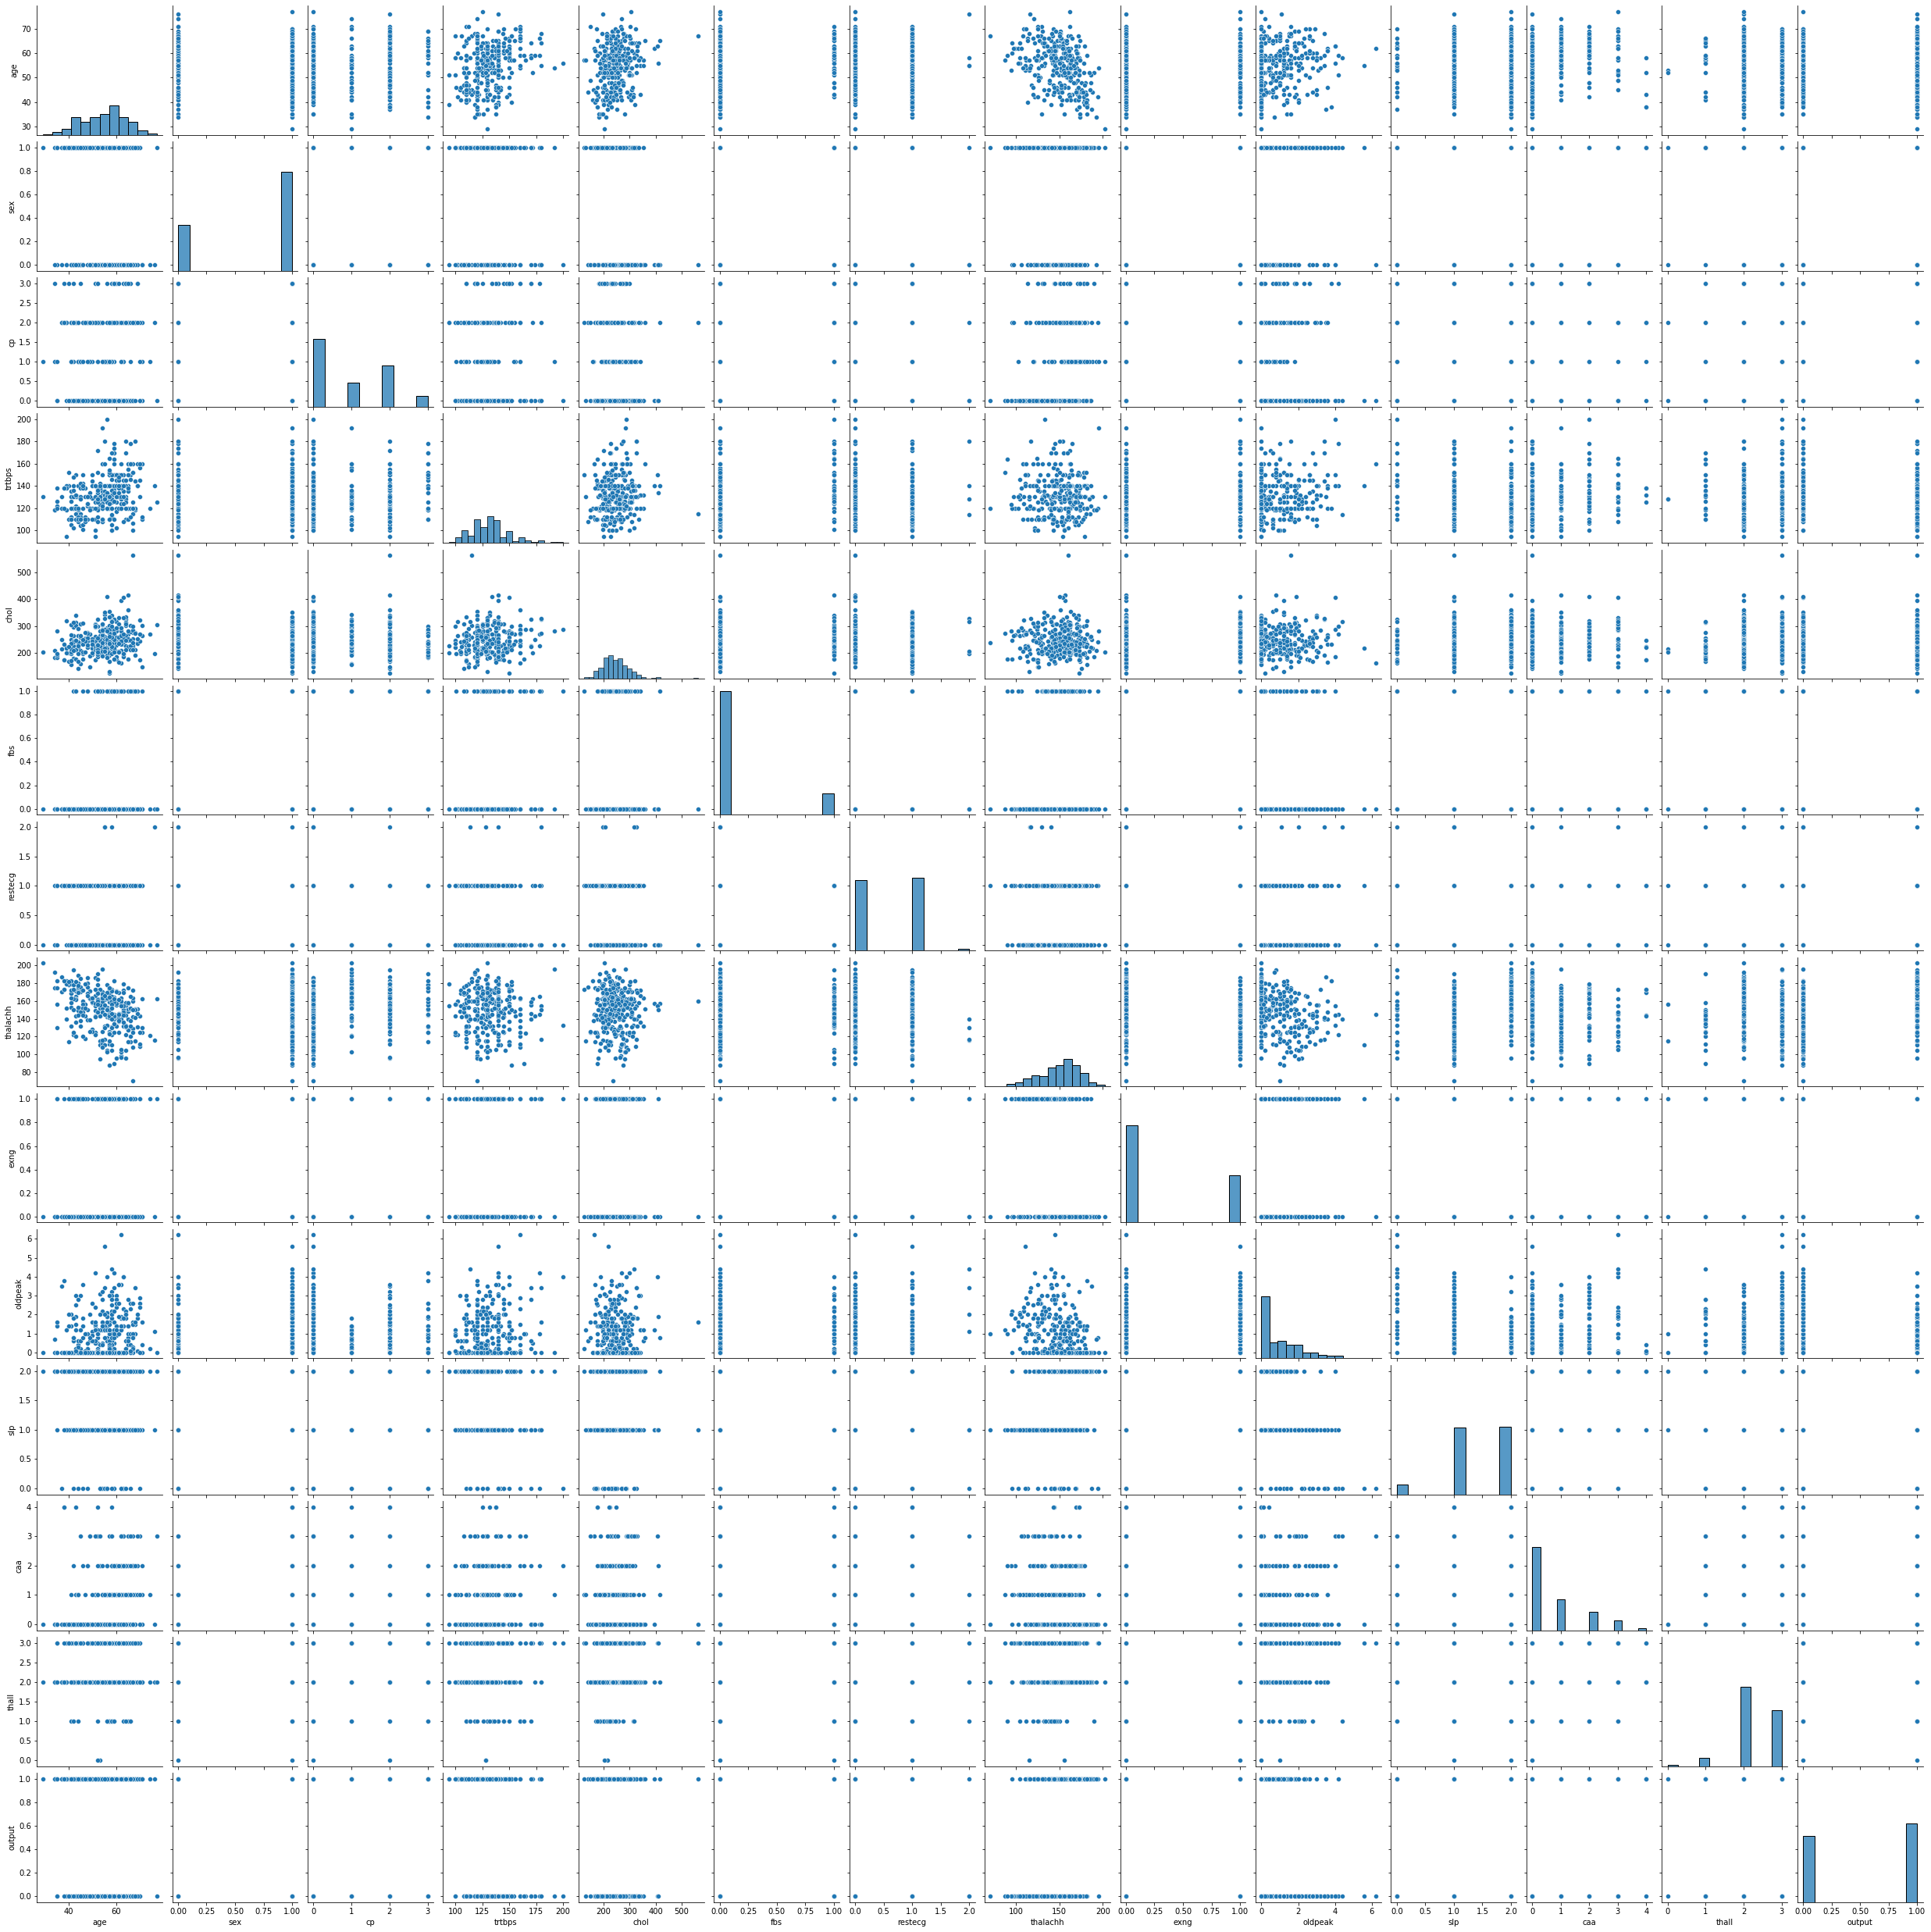

In [38]:
sns.pairplot(data=df)

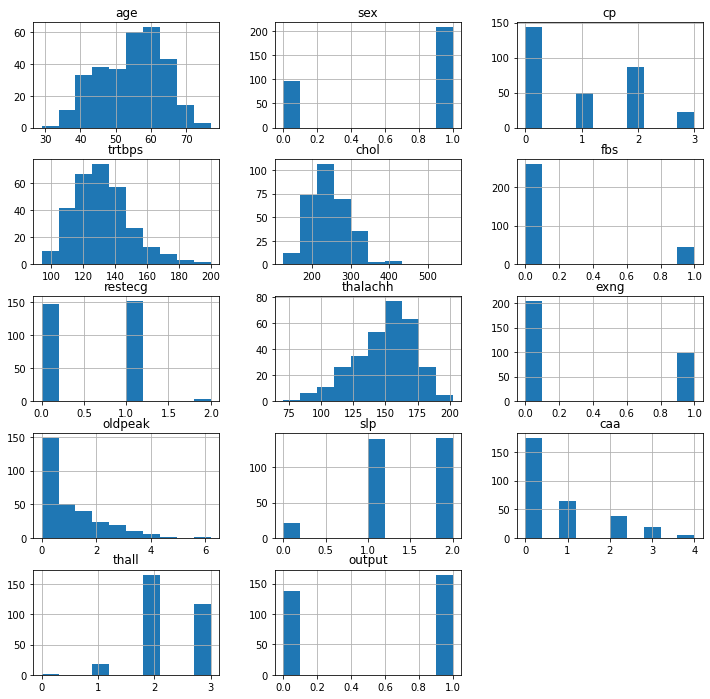

In [39]:
df.hist(figsize=(12,12), layout=(5,3));

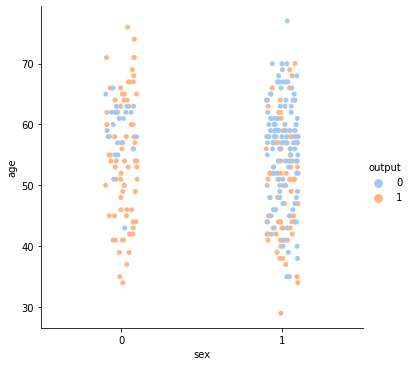

In [42]:
sns.catplot(data=df, x='sex', y='age', hue='output', palette='pastel')



1.   females have higher number of heart disease than male
2.   females start having it between age 30-40 
3.   males have lower number of heart disease than male but they start getting it at earlier age as compare to female.
#keypoint- 0  is for not having heart disease and 1 is for having .


now we will check cholestrol for male and female

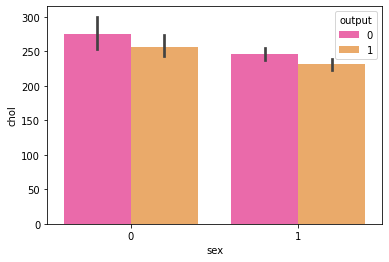

In [43]:
sns.barplot(data=df, x='sex', y='chol', hue='output', palette='spring')

In [45]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

total 96 females and 207 males

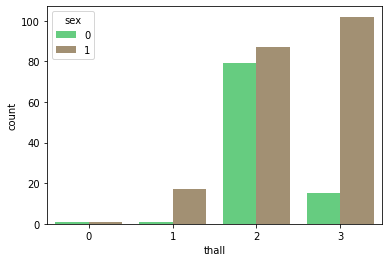

In [49]:
sns.countplot(x='thall',hue='sex', data=df, palette='terrain')

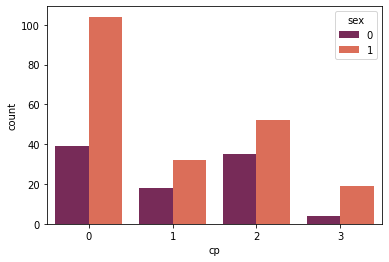

In [50]:
sns.countplot(x='cp', data=df, hue='sex', palette='rocket')



1.   when chest pain is 2 there is greater risk in man having heartattack



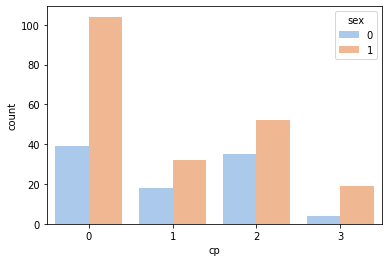

In [52]:
sns.countplot(x='cp', data=df, hue='sex', palette='pastel')

females have low number of chestpain as compare to males.

In [54]:
chest_pain = pd.crosstab(df['cp'], df['output'])
chest_pain

output,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


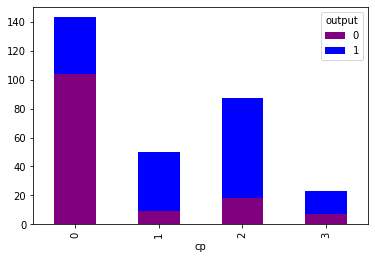

In [55]:
chest_pain.plot(kind='bar', stacked=True , color=['purple','blue'],grid=False)

At level 2 of chestpain having risk of heart disease gets higher , where s on level 3  its lower than level 2.

In [ ]:
jovian.commit(project='heartdisease.analysis')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 